In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [112]:
boston=datasets.load_boston()

In [113]:
df=pd.DataFrame(boston.data,columns=boston.feature_names)
df['MEDV']=boston.target


In [114]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [132]:
boston.feature_names


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [115]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


<AxesSubplot:>

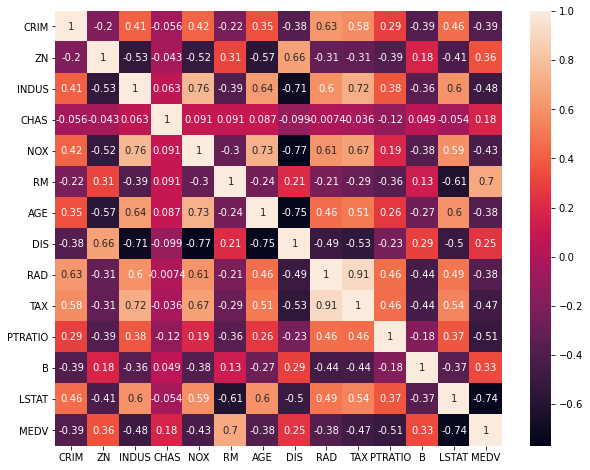

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [117]:
target_corr=df.corr()['MEDV']
highly_correlated_feat=target_corr[abs(target_corr)>=0.5]
highly_correlated_feat

RM         0.695360
PTRATIO   -0.507787
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

In [124]:
l=highly_correlated_feat.index[:-1]
l

Index(['RM', 'PTRATIO', 'LSTAT'], dtype='object')

In [9]:
X=df[['RM','PTRATIO','LSTAT']]
Y=df['MEDV']

In [94]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.10,random_state=45)

In [95]:
scaler=MinMaxScaler()

In [96]:
scaled=scaler.fit_transform(x_train,y_train)

In [97]:
x_scaled=pd.DataFrame(scaled,columns=['RM','PTRATIO','LSTAT'])

In [98]:
rfr=RandomForestRegressor(max_depth=8, max_features='sqrt', min_samples_split=5,n_estimators=200)

In [99]:
rfr.fit(x_scaled,y_train)

RandomForestRegressor(max_depth=8, max_features='sqrt', min_samples_split=5,
                      n_estimators=200)

In [100]:
rfr.score(x_scaled,y_train)

0.9179803684015364

In [101]:
x_test_scaled=pd.DataFrame(data=scaler.transform(x_test),columns=['RM','PTRATIO','LSTAT'])

In [102]:
rfr.score(x_test_scaled,y_test)

0.8907983337775861

In [103]:
rfr.predict(scaler.transform([[6.41,17.8,9.14]]))

array([23.44344353])

In [104]:
rfr.predict(scaler.transform([[7.147,18.7,5.33]]))

array([33.34028312])

#### model saving

In [105]:
import pickle

In [107]:
filename='random_forest.pickle'
pickle.dump(rfr,open(filename,'wb'))
loaded_model=pickle.load(open(filename,'rb'))

In [109]:
loaded_model.predict(scaler.transform([[7.147,18.7,5.33]]))

array([33.34028312])

In [110]:
loaded_model.predict([[7.147,18.7,5.33]])

array([20.71680774])